1. KNN: Dummy Data

2. Regresión Lineal Simple: 'Semana 05 - Módulo 02 - Clase 09 - student_scores'

3. Regres. Multivariada: 'Semana 05 - Módulo 02 - Clase 09 - petrol_consumption'

4. SVM: 'Semana 05 - Módulo 02 - Clase 09 - svm_data'

5. Hypertunning + Random Forest Regressor: 'https://archive.ics.uci.edu/ml/machine-learning-databases/00320/student.zip'

6. Logistic Regresion: Dummy Data

## KNN

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

In [ ]:
data = {'Masa': [50, 80, 90, 45, 60],
        'Altura': [1.48, 1.82, 1.85, 1.55, 1.60],
        'Genero': ['m', 'h', 'h', 'm', 'm']}

In [ ]:
data

{'Masa': [50, 80, 90, 45, 60],
 'Altura': [1.48, 1.82, 1.85, 1.55, 1.6],
 'Genero': ['m', 'h', 'h', 'm', 'm']}

In [ ]:
punto_nuevo = {'Masa': [72],
               'Altura': [1.84]}

In [ ]:
df = pd.DataFrame(data)
punto_nuevo = pd.DataFrame(punto_nuevo)

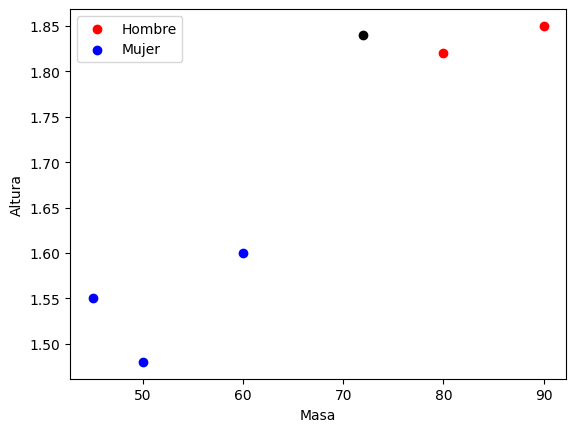

In [ ]:
ax = plt.axes()

ax.scatter(df.loc[df['Genero'] == 'h', 'Masa'],
           df.loc[df['Genero'] == 'h', 'Altura'],
           c="red",
           label="Hombre")
ax.scatter(df.loc[df['Genero'] == 'm', 'Masa'],
           df.loc[df['Genero'] == 'm', 'Altura'],
           c="blue",
           label="Mujer")
ax.scatter(punto_nuevo['Masa'],
           punto_nuevo['Altura'],
           c="black")
plt.xlabel("Masa")
plt.ylabel("Altura")
ax.legend()
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=4)
X = df[['Masa', 'Altura']]
y = df[['Genero']]

knn.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=4)

([<matplotlib.axis.XTick at 0x7c065f937b80>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5')])

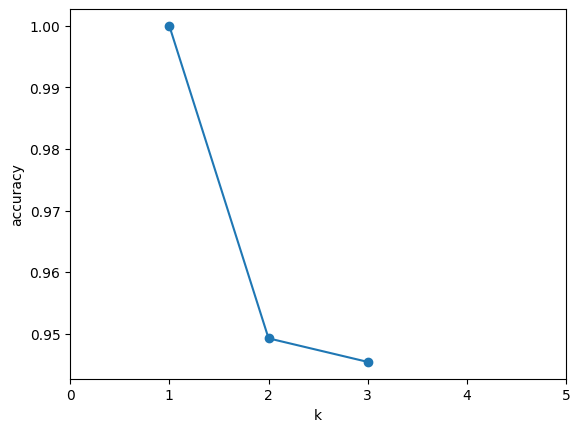

In [ ]:
K = range(1, 4)
list_knn = []

for k in K:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X, y)
    list_knn.append(knn.score(X, y))

plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(K, list_knn)
plt.plot(K, list_knn)
plt.xticks([0,1,2,3,4,5])


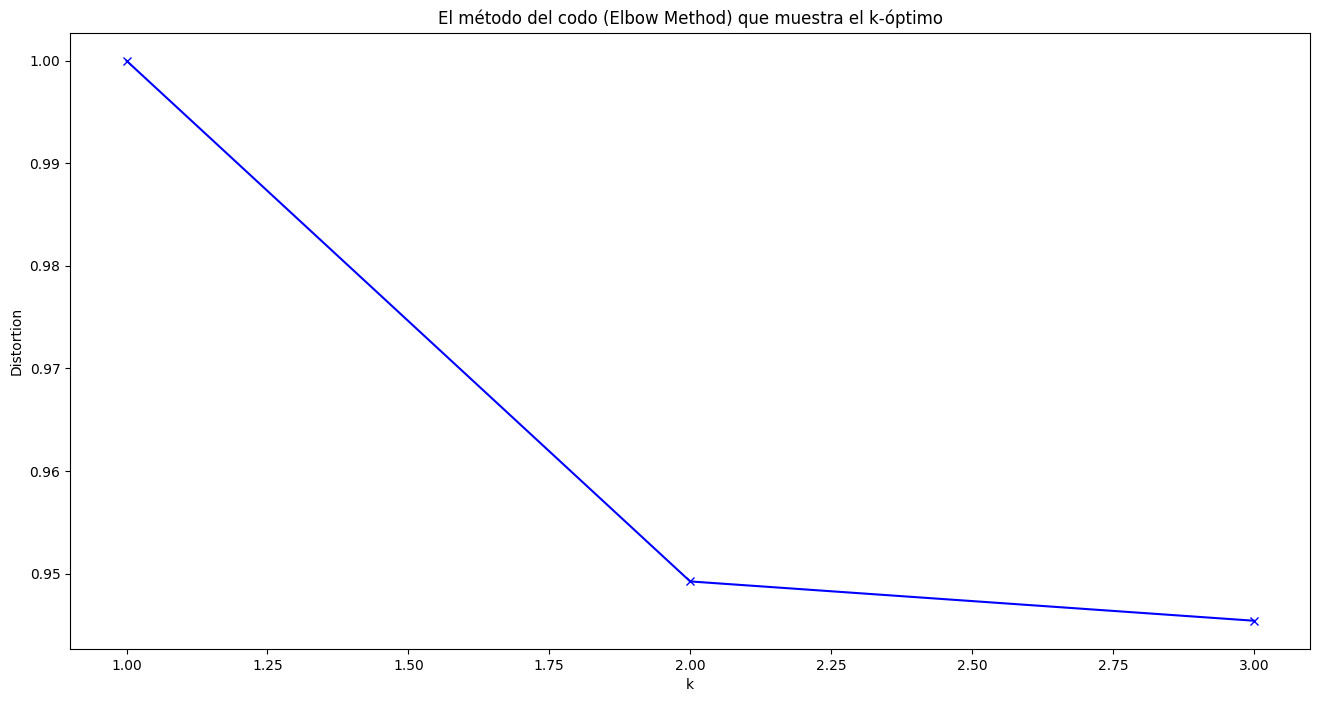

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(K, list_knn, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('El método del codo (Elbow Method) que muestra el k-óptimo')
plt.show()

In [ ]:
prediccion = knn.predict(punto_nuevo)
print(prediccion)

['h']


# LinearRegression

In [ ]:
import requests, io, zipfile
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Montar volumen y cargar df
from google.colab import drive
drive.mount('/content/drive')

C_MAIN_PATH = '/content/drive/MyDrive/UP/00_Diplomatura_IA_2024/'
V_NOMBRE_ARCHIVO_MAESTRO = 'Semana 05 - Módulo 02 - Clase 09 - student_scores'
V_PATH_Y_NOMRE_ARCHIVO = C_MAIN_PATH + V_NOMBRE_ARCHIVO_MAESTRO + '.csv'

students_df = pd.DataFrame(pd.read_csv(V_PATH_Y_NOMRE_ARCHIVO, sep = ","))

students_df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


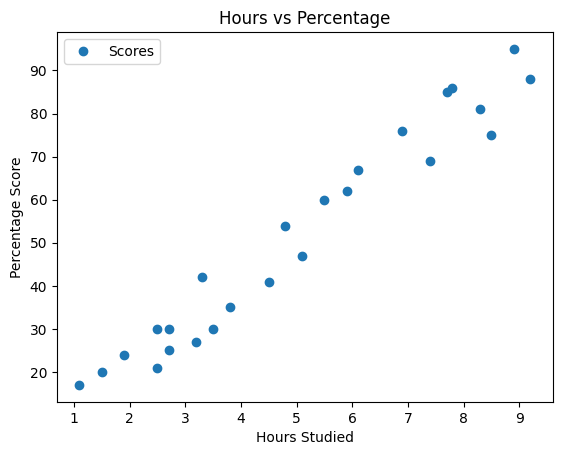

In [ ]:
students_df.plot(x='Hours', y='Scores', style="o")
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

In [ ]:
X = students_df.iloc[:, :-1].values
y = students_df.iloc[:, 1].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
print(regressor.intercept_)

2.018160041434662


In [ ]:
print(regressor.coef_)

[9.91065648]


In [ ]:
y_pred = regressor.predict(X_test)
print(X_test)
print(y_test)
print(y_pred)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]
[20 27 69 30 62]
[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


In [ ]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
results

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


## Regression Multivariada

In [ ]:
# Montar volumen y cargar df
from google.colab import drive
drive.mount('/content/drive')

C_MAIN_PATH = '/content/drive/MyDrive/UP/00_Diplomatura_IA_2024/'
V_NOMBRE_ARCHIVO_MAESTRO = 'Semana 05 - Módulo 02 - Clase 09 - petrol_consumption'
V_PATH_Y_NOMRE_ARCHIVO = C_MAIN_PATH + V_NOMBRE_ARCHIVO_MAESTRO + '.csv'

petro_df = pd.DataFrame(pd.read_csv(V_PATH_Y_NOMRE_ARCHIVO, sep = ","))

petro_df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [ ]:
petro_df.size

240

<Axes: >

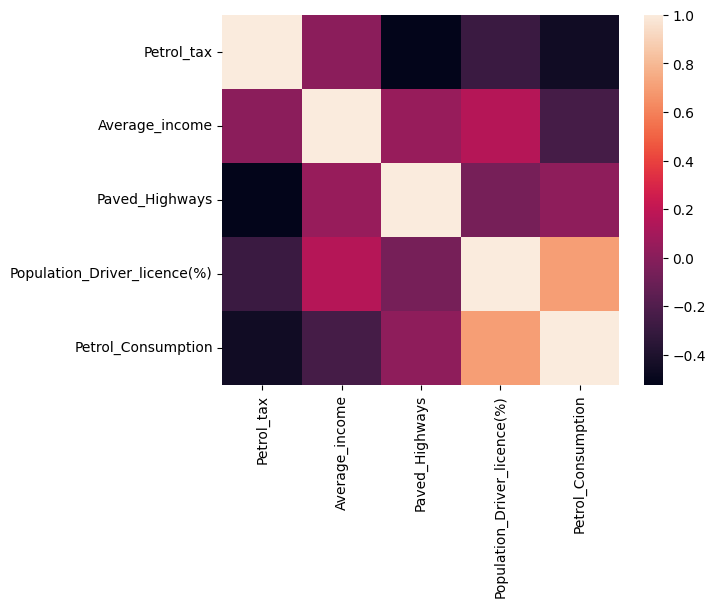

In [ ]:
sns.heatmap(petro_df.corr())

In [ ]:
X = petro_df[['Petrol_tax', 'Average_income', 'Paved_Highways','Population_Driver_licence(%)']]
y = petro_df['Petrol_Consumption']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Petrol_tax,-40.016660
Average_income,-0.065413
Paved_Highways,-0.004741
Population_Driver_licence(%),1341.862121


In [ ]:
regressor.intercept_

425.5993322032431

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
print(X_test)

    Petrol_tax  Average_income  Paved_Highways  Population_Driver_licence(%)
29         9.0            3601            4650                         0.493
4          8.0            4399             431                         0.544
26         8.0            3448            5399                         0.548
30         7.0            3640            6905                         0.518
32         8.0            3063            6524                         0.578
37         7.0            3897            6385                         0.586
34         8.0            3528            3495                         0.487
40         7.0            4449            4639                         0.626
7          8.0            5126            2138                         0.553
10         8.0            4391            5939                         0.530


In [ ]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
results

,Actual,Predicted
29,534,469.391989
4,410,545.645464
26,577,589.668394
30,571,569.730413
32,577,649.774809
37,704,646.631164
34,487,511.608148
40,587,672.475177
7,467,502.074782
10,580,501.270734


Pruebo con una predicción puntual:

In [ ]:
y_pred = regressor.predict([[9.0, 3601, 4650, 0.493]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
results = pd.DataFrame({'Predicted': y_pred})
results

,Predicted
0,469.391989


## SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

In [ ]:
# Montar volumen y cargar df
from google.colab import drive
drive.mount('/content/drive')

C_MAIN_PATH = '/content/drive/MyDrive/UP/00_Diplomatura_IA_2024/'
V_NOMBRE_ARCHIVO_MAESTRO = 'Semana 05 - Módulo 02 - Clase 09 - svm_data'
V_PATH_Y_NOMRE_ARCHIVO = C_MAIN_PATH + V_NOMBRE_ARCHIVO_MAESTRO + '.csv'

datos = pd.DataFrame(pd.read_csv(V_PATH_Y_NOMRE_ARCHIVO, sep = ","))

print(datos.size)
datos.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
600


,X1,X2,y
0,2.526093,0.321050,0
1,0.366954,0.031462,0
2,0.768219,0.717486,0
3,0.693436,0.777194,0
4,-0.019837,0.867254,0


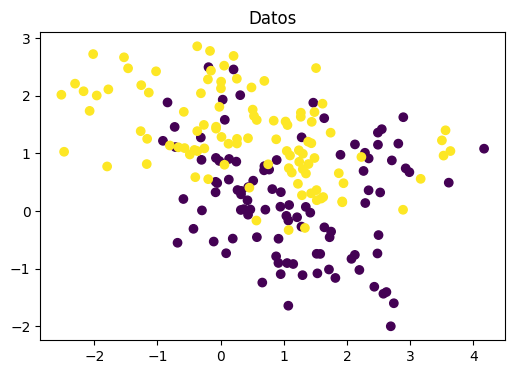

In [ ]:
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(datos.X1, datos.X2, c=datos.y);
ax.set_title("Datos");

In [ ]:
X = datos.drop(columns = 'y')
y = datos['y']

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.7,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [ ]:
modelo = SVC(C = 100, kernel = 'linear', random_state=123)
modelo.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=100, kernel='linear', random_state=123)

In [ ]:
SVC?

In [ ]:
y_train_pred = modelo.predict(X_train)
y_test_pred = modelo.predict(X_test)

In [ ]:
w = modelo.coef_[0]
b = modelo.intercept_[0]
x_points = np.linspace(-2, 4)
y_points = -(w[0] / w[1]) * x_points - b / w[1]

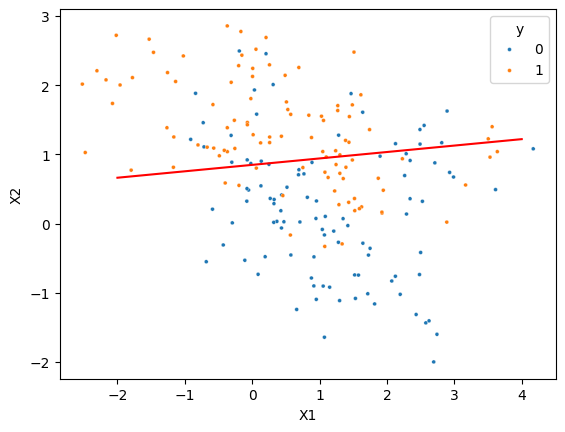

In [ ]:
sns.scatterplot(x=datos.X1,
                y=datos.X2,
                hue=datos.y,
                s=8)
plt.plot(x_points, y_points, c='r');

In [ ]:
train_accuracy = accuracy_score(y_train, y_train_pred)

print('% de aciertos sobre el set de entrenamiento:',train_accuracy)

% de aciertos sobre el set de entrenamiento: 0.7357142857142858


In [ ]:
test_accuracy = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de evaluación:',test_accuracy)

% de aciertos sobre el set de evaluación: 0.7166666666666667


## Hypertunning + Random Forest Regressor

In [ ]:
#Welcome to the UC Irvine Machine Learning Repository : https://archive.ics.uci.edu/
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00320/student.zip'
resp = requests.get(url)
z = zipfile.ZipFile(io.BytesIO(resp.content))
z.extractall("student_performance")

math_data = pd.read_csv("/content/student_performance/student-mat.csv", sep=";")
port_data = pd.read_csv("/content/student_performance/student-por.csv", sep=";")

In [ ]:
math_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [ ]:
students_data = pd.DataFrame()

#students_data = students_data.append(math_data)
students_data = students_data._append(math_data,ignore_index=True)

#students_data = students_data.append(port_data)
students_data = students_data._append(port_data,ignore_index=True)

In [ ]:
students_data= students_data.drop_duplicates()

In [ ]:
students_data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1044.0,16.726054,1.239975,15.0,16.0,17.0,18.0,22.0
Medu,1044.0,2.603448,1.124907,0.0,2.0,3.0,4.0,4.0
Fedu,1044.0,2.387931,1.099938,0.0,1.0,2.0,3.0,4.0
traveltime,1044.0,1.522989,0.731727,1.0,1.0,1.0,2.0,4.0
studytime,1044.0,1.970307,0.834353,1.0,1.0,2.0,2.0,4.0
failures,1044.0,0.264368,0.656142,0.0,0.0,0.0,0.0,3.0
famrel,1044.0,3.935824,0.933401,1.0,4.0,4.0,5.0,5.0
freetime,1044.0,3.201149,1.031507,1.0,3.0,3.0,4.0,5.0
goout,1044.0,3.156130,1.152575,1.0,2.0,3.0,4.0,5.0
Dalc,1044.0,1.494253,0.911714,1.0,1.0,1.0,2.0,5.0


In [ ]:
students_data.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [ ]:
students_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [ ]:
le = LabelEncoder()
for column_name in students_data.columns:
    if students_data[column_name].dtype == object:
        students_data[column_name] = le.fit_transform(students_data[column_name])
    else:
        pass

In [ ]:
students_data.dtypes

school        int64
sex           int64
age           int64
address       int64
famsize       int64
Pstatus       int64
Medu          int64
Fedu          int64
Mjob          int64
Fjob          int64
reason        int64
guardian      int64
traveltime    int64
studytime     int64
failures      int64
schoolsup     int64
famsup        int64
paid          int64
activities    int64
nursery       int64
higher        int64
internet      int64
romantic      int64
famrel        int64
freetime      int64
goout         int64
Dalc          int64
Walc          int64
health        int64
absences      int64
G1            int64
G2            int64
G3            int64
dtype: object

In [ ]:
X = students_data.drop(["higher"], axis=1)
y = students_data["higher"]

In [ ]:
(X_train, X_test,y_train, y_test) = train_test_split(X,y,stratify=y,test_size=0.30,random_state=42)

In [ ]:
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
y_test_pred = decision_tree.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, recall_score

test_accuracy = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de evaluación:',test_accuracy)

% de aciertos sobre el set de evaluación: 0.9044585987261147


In [ ]:
recall_score(y_test, y_test_pred)

0.9477351916376306

In [ ]:
confusion_matrix(y_test, y_test_pred)

array([[ 12,  15],
       [ 15, 272]])

<Axes: >

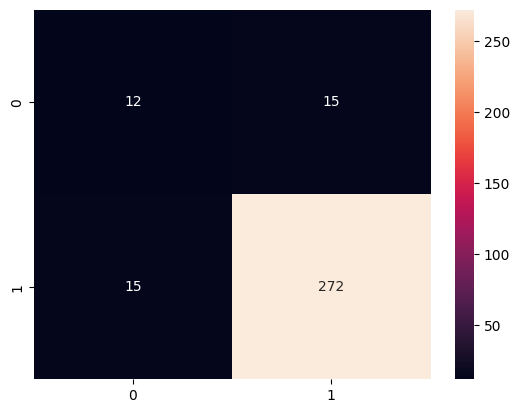

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_test_pred),annot=True, fmt='d')

In [ ]:
random_forest_m = RandomForestClassifier(random_state=42, n_estimators=200,class_weight="balanced_subsample",max_features="log2")
random_forest_m.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced_subsample', max_features='log2',
                       n_estimators=200, random_state=42)

In [ ]:
print(X_test)

      school  sex  age  address  famsize  Pstatus  Medu  Fedu  Mjob  Fjob  \
525        0    0   15        0        0        1     3     4     3     4   
1016       1    0   17        0        0        1     1     2     2     3   
738        0    0   18        1        0        1     4     3     2     2   
942        1    1   16        0        1        1     4     1     2     0   
304        0    1   19        1        0        1     3     3     2     2   
...      ...  ...  ...      ...      ...      ...   ...   ...   ...   ...   
999        1    0   18        1        0        1     1     1     0     3   
582        0    0   16        1        0        1     1     3     0     3   
688        0    0   18        1        1        1     1     1     2     0   
472        0    0   16        1        0        1     2     2     2     2   
801        0    0   17        1        0        1     3     1     2     0   

      ...  famrel  freetime  goout  Dalc  Walc  health  absences  G1  G2  G

In [ ]:
y_test_pred = random_forest_m.predict(X_test)

In [ ]:
test_accuracy = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de evaluación:',test_accuracy)

% de aciertos sobre el set de evaluación: 0.9203821656050956


In [ ]:
from sklearn.tree import export_graphviz, plot_tree

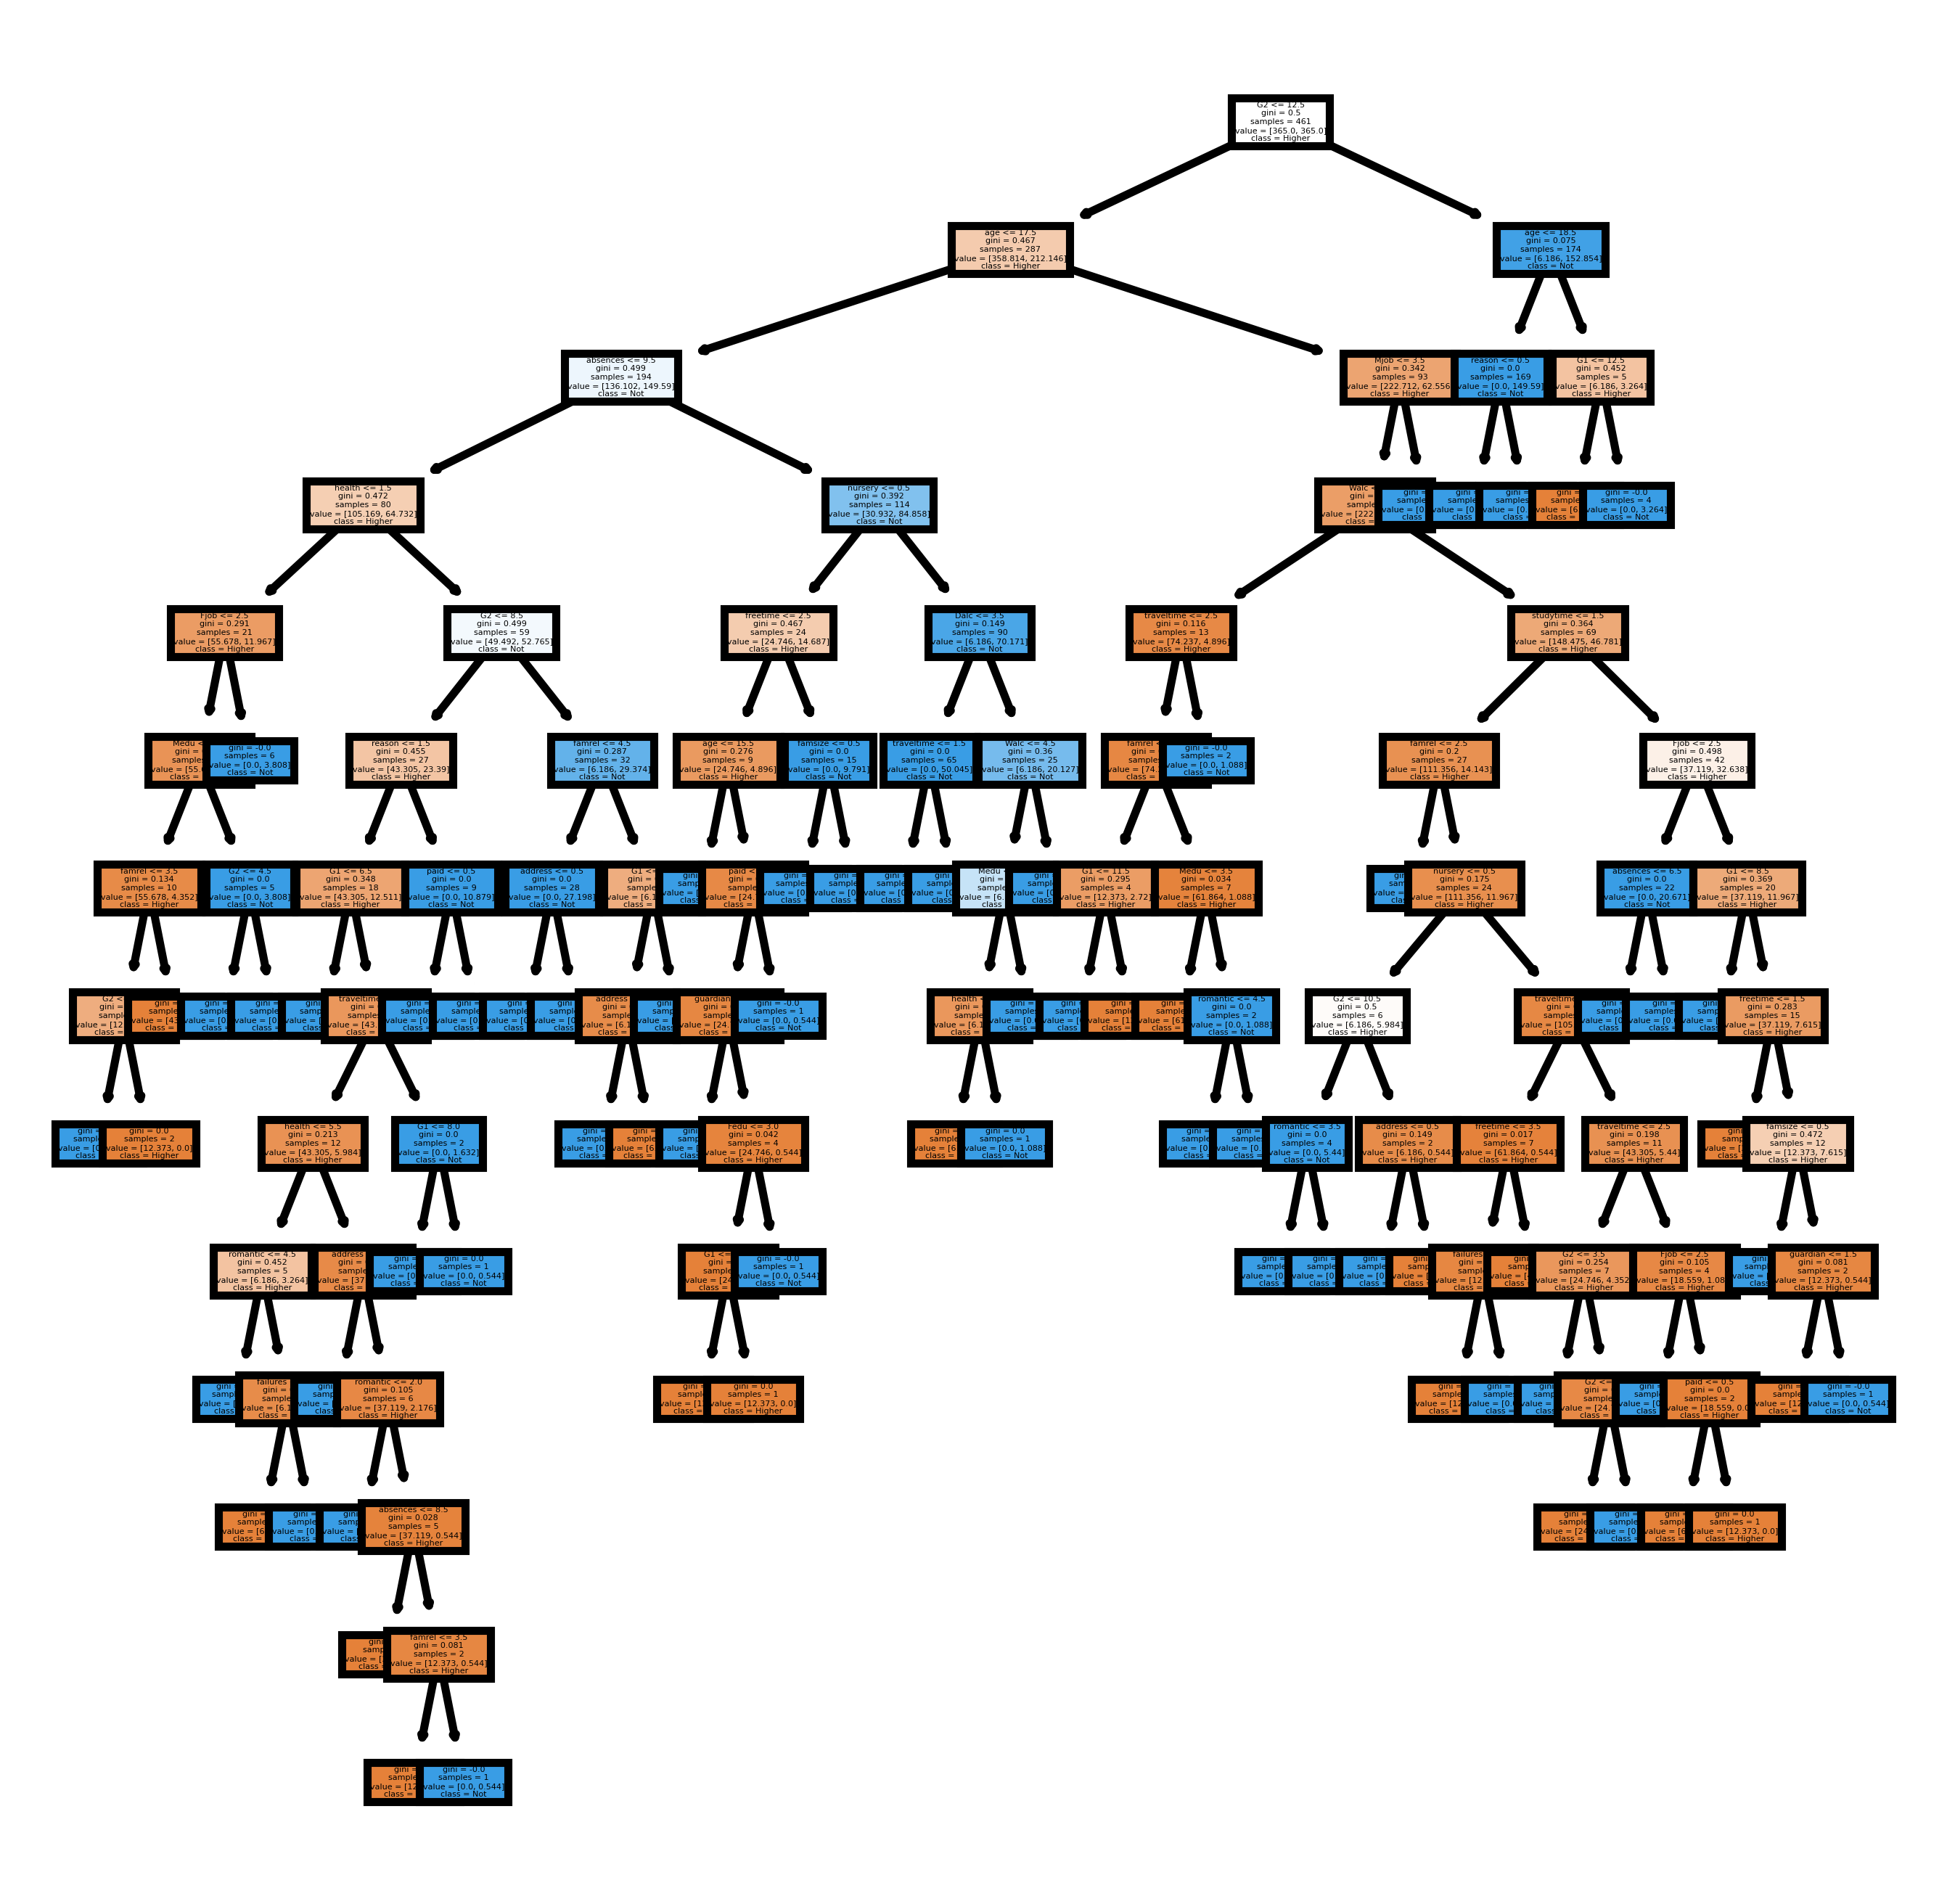

In [ ]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
plot_tree(random_forest_m.estimators_[0],
               feature_names = students_data.columns,
               class_names=["Higher", "Not"],
               filled = True);
fig.savefig('rf_individualtree.png')

<Axes: >

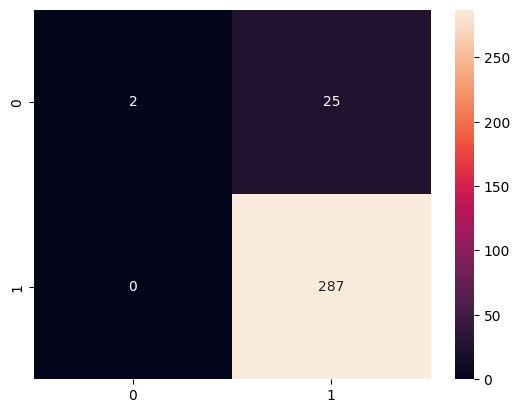

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_test_pred),annot=True, fmt='d')

## Logistic Regresion

In [ ]:
import numpy as np

In [ ]:
study_hs = np.array([0.5, 0.75, 1, 1.25, 1.5, 1.75, 1.75, 2, 2.25, 2.5, 2.75, 3, 3.25, 3.5, 4, 4.25, 4.5, 4.75, 5, 5.5]).reshape(-1,1)
pass_or_not = np.array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1])

In [ ]:
from sklearn.linear_model import LogisticRegression

reg_log = LogisticRegression()

reg_log.fit(study_hs,pass_or_not)

LogisticRegression()

In [ ]:
hs_test = np.array([0.5, 1, 3, 6]).reshape(-1,1)

In [ ]:
pred = reg_log.predict(hs_test)
print(pred)

[0 0 1 1]


In [ ]:
scores_reg = reg_log.predict_proba(hs_test)
print(scores_reg)

[[0.92858952 0.07141048]
 [0.87984046 0.12015954]
 [0.42402118 0.57597882]
 [0.02293029 0.97706971]]


In [ ]:
print(scores_reg[:,1])

[0.07141048 0.12015954 0.57597882 0.97706971]
